<div align="center">
      <h1>Linear Classifier as a Template Matching Algorithm</h1>
      <hr>
      <p>In this notebook, you will implement a linear classifier on CIFAR-10. In images it might be better to think about linear classifier differently than in the previous notebook. In the previous notebook, we have used the linear classifier to classify the data points in the feature space. We tried to find the best hyperplanes that separate the data points in the feature space. In images, we can think about the linear classifier as a classifier that tries to find the best hyperplanes that separate the images in the pixel space, but that is kind of hard to imagine. Instead we will build an understaning of the linear classifier using different perspective - template matching.</p>
</div>

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

CIFAR-10 dataset already exists


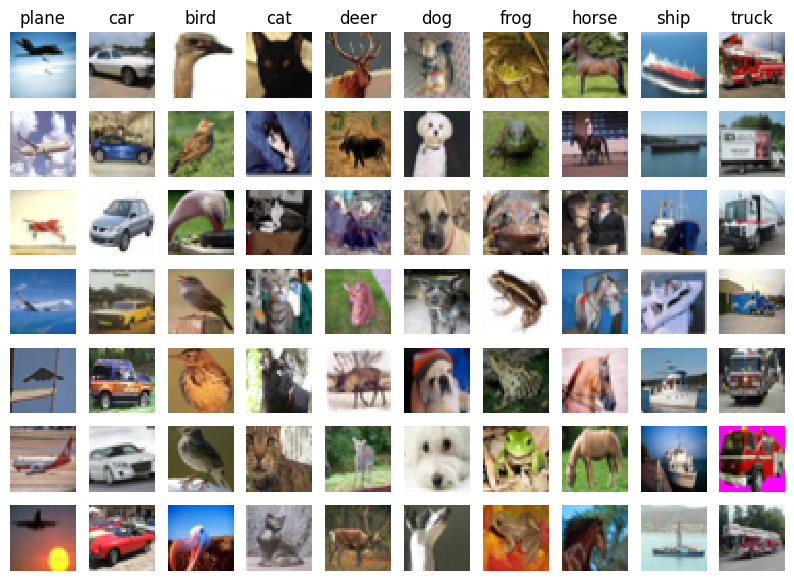

---------------- Training data ----------------
X_train shape: (45000, 32, 32, 3), y_train shape: (45000,)

---------------- Validation data ----------------
X_val shape: (5000, 32, 32, 3), y_val shape: (5000,)

---------------- Testing data ----------------
X_test shape: (10000, 32, 32, 3), y_test shape: (10000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 45000, which is 75.00% of the dataset
Number of samples in validation set: 5000, which is 8.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset


In [2]:
import torch
from utils import load_cifar10, reshape_to_vectors, dataset_stats

# download the CIFAR-10 dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10(directory='./data/datasets/CIFAR10',
                                                              visualize_samples=True)

# Print out the dataset statistics and visualize a few samples
num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)

Training: 100%|██████████| 4000/4000 [00:12<00:00, 318.21it/s]


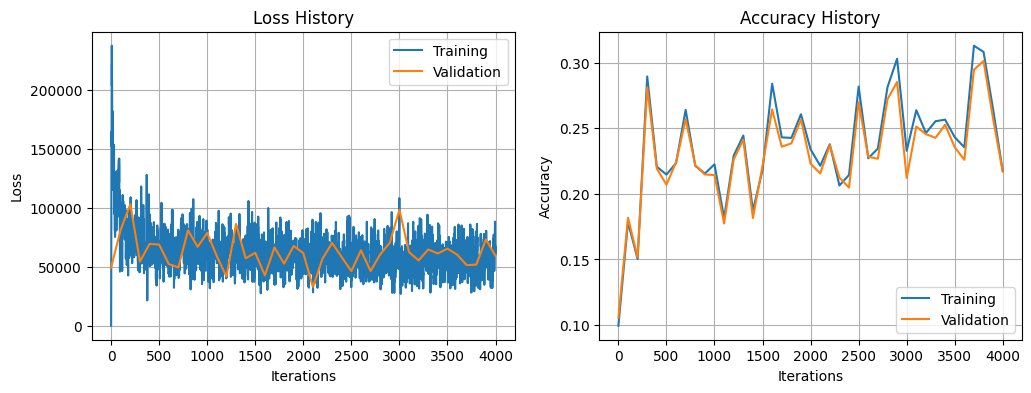

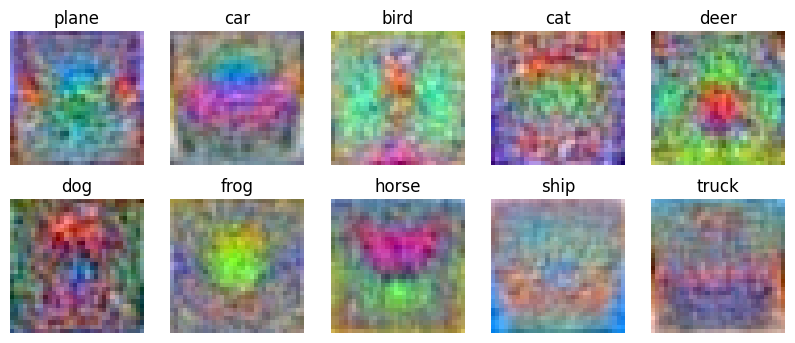

In [3]:
import torch

from assignments import LinearClassifier
from utils import plot_training, plot_weights_as_templates

torch.random.manual_seed(69)

# Create a linear classifier instance
linear_classifier = LinearClassifier(num_features=num_features,
                                       num_classes=num_classes,
                                       learning_rate=1e-2,
                                       num_iters=4000,
                                       batch_size=400)
# Train the classifier
loss_history, acc_history = linear_classifier.train(X_train, y_train, X_val, y_val)

# Visualize the training process
plot_training(loss_history, acc_history)
plot_weights_as_templates(linear_classifier.params['W'], classes)
